# SMS SPAM DETECTION USING NLP

**Introduction**

This project focuses on detecting spam messages in SMS using Natural Language Processing (NLP) techniques. We utilize the UCI SMS dataset, which contains labeled messages. The objective is to build a **classification model** to predict whether a given text message is spam or not, using techniques such as text preprocessing, vectorization, and classification.


### **Table of Contents**  
1. **Introduction**  
2. **Installing Required Packages**  
3. **Importing Required Packages and Modules**  
4. **Data Preprocessing**  
   - Loading the Dataset  
   - Initial Data Exploration  
   - Exploring the Labels  
   - Handling Missing and Duplicate Data  
   - Visualizing the Label Distribution  
   - Adding and Analyzing Message Length  
   - Visualizing Message Length  
5. **Text Cleaning**  
6. **Vectorization**  
   - Bag of Words  
   - TF-IDF Transformation  
7. **Model Training**  
   - Training and Testing Data Split  
   - Training the Model  - SVC
   - Making Predictions  
8. **Evaluation**  
   - Comparison of Predictions and Actual Values  
   - Visualizations  
   - Performance Metrics  

1. **Installing required packages**

 - Install all necessary libraries, including pandas, numpy, nltk, scikit-learn, matplotlib, seaborn, and wordcloud.

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install nltk
!pip install spacy
!pip install chardet
!pip install wordcloud matplotlib

**2. Importing Required Packages and Modules**

  - Import essential libraries for data manipulation, visualization, and machine learning.

In [ ]:
import pandas # Data manipulation and analysis
import numpy # numerical computations

import string # handle and manipulate strings
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer # Converts text into BoW format
from sklearn.feature_extraction.text import TfidfTransformer # Converts BoW into TF-IDF format

from sklearn.model_selection import train_test_split # splitting the data into training and testing subsets
from sklearn.svm import SVC # Support Vector Classifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # evaluation metrics
from sklearn.model_selection import GridSearchCV # hyperparameter tuning by searching for the best combination of parameters using cross-validation.

import seaborn as sns # For creating informative and aesthetically pleasing statistical plots.
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations.

from collections import Counter # To count the occurrences of items in an iterable


# 3. Data Preprocessing


**1. Loading the Dataset**

 - Load the SMS dataset containing two columns: labels (ham or spam) and messages

 https://archive.ics.uci.edu/dataset/228/sms+spam+collection - Dataset Link



**About the Dataset**
- Labels:
  - Ham: Not spam.
  - Spam: Unwanted or unsolicited messages.
- Messages: Contains the actual SMS text data.
- Dataset Size: 5,573 rows.

In [ ]:
file_path = "/content/spam_utf.csv"

# Load the CSV file with Windows-1252 encoding
data = pandas.read_csv(file_path)

**2. Initial Data Exploration**

 - Inspect the dataset using head(), describe(), info(), and columns.
Rename columns and remove empty or irrelevant columns for consistency

In [ ]:
# Display the first few rows to confirm
print(data.head(10))

  labels                                           messages Unnamed: 2  \
0    ham  Go until jurong point, crazy.. Available only ...        NaN   
1    ham                      Ok lar... Joking wif u oni...        NaN   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3    ham  U dun say so early hor... U c already then say...        NaN   
4    ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5   spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6    ham  Even my brother is not like to speak with me. ...        NaN   
7    ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8   spam  WINNER!! As a valued network customer you have...        NaN   
9   spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6  

In [ ]:
#Describe
print(data.describe())

       labels                messages  \
count    5572                    5572   
unique      2                    5169   
top       ham  Sorry, I'll call later   
freq     4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


In [ ]:
# Statistics
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   labels      5572 non-null   object
 1   messages    5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [ ]:
data.columns

Index(['labels', 'messages', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
# Drop the Null Columns
data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

**3. Exploring the Labels**

 - Analyze the labels column using value_counts() to understand the distribution of spam and non-spam messages.

In [ ]:
# Exploring the result column
data['labels']

,labels
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [ ]:
# Counting the results occurences in the labels column
data['labels'].value_counts()

,count
labels,
ham,4825
spam,747


**4. Handling Missing and Duplicate Data**

 - Check for null values and remove rows with missing data.
Identify and retain only the first occurrence of duplicate rows.

In [ ]:
# Checking for any null values
data.isnull()

,labels,messages
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [ ]:
# Printing null valuez from each column
data.isnull().sum()

,0
labels,0
messages,0


In [ ]:
# Dropping empty rows
data.dropna()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Checking for any duplicated rows
data.duplicated().sum()

403

In [ ]:
# Dropping the duplicated rows
df = data.drop_duplicates(keep = 'first')

In [ ]:
# Checking if any more duplicates rows exist
df.duplicated().sum()

0

**5. Visualizing the Label Distribution**

 - Create a pie chart to visualize the proportion of spam and non-spam messages

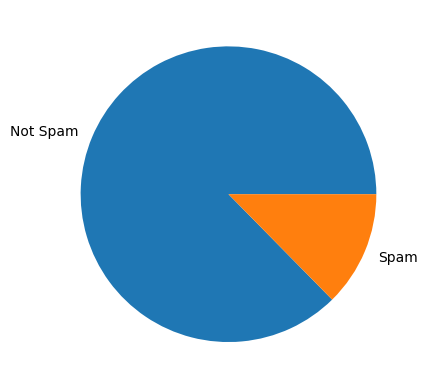

In [ ]:
# Visualising the result column
import matplotlib.pyplot as plt
plt.pie(df['labels'].value_counts(),labels = ["Not Spam","Spam"])
plt.show()

**6. Adding and Analyzing Message Length**

 - Add a length column to store the character count of each message.
Sort and analyze messages with the highest and lowest lengths.


In [ ]:
data["length"] = data["messages"].apply(len)
data.sort_values(by = "length", ascending = False).head(10)

,labels,messages,length
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2847,ham,Sad story of a Man - Last week was my b'day. M...,588
2157,ham,Sad story of a Man - Last week was my b'day. M...,588
2379,ham,"Good evening Sir, hope you are having a nice d...",482
3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1512,ham,"Hey sweet, I was wondering when you had a mome...",458
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...,450


In [ ]:
# After adding length column
data.columns

Index(['labels', 'messages', 'length'], dtype='object')

**7. Visualizing Message Length**

 - Create a histogram to compare the message lengths for spam and non-spam messages.

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

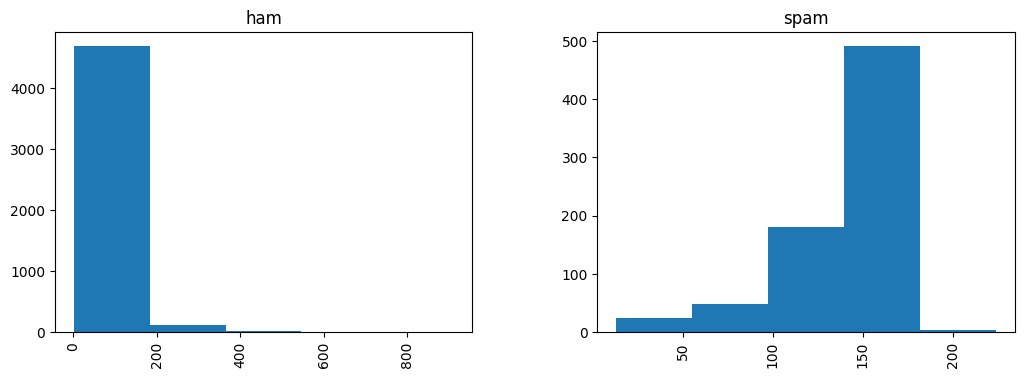

In [ ]:
data.hist(column = 'length', by ='labels',figsize=(12,4), bins = 5)

# 4. Text Cleaning

**1. Text Preprocessing**

- Import necessary libraries such as nltk, stopwords, and punctuation.


In [ ]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**2. Transform_message function to preprocess messages by:**

 - Removing punctuation.
 - Tokenizing and filtering out stopwords.
 - Converting text to lowercase.

In [ ]:
# Function to clean and preprocess messages
def transform_message(message):
    # Remove punctuation
    mess_without_punc = ''.join([char for char in message if char not in string.punctuation])

    # Split the message into words
    message_split = mess_without_punc.split()

    # Remove stopwords and convert words to lowercase
    filtered_words = [word.lower() for word in message_split if word.lower() not in stopwords.words('english')]

    return ' '.join(filtered_words)  # Join tokens back into a string

**3. Word Cloud Visualization**

 - Generate separate word clouds for spam and non-spam messages to understand common words used in each category.

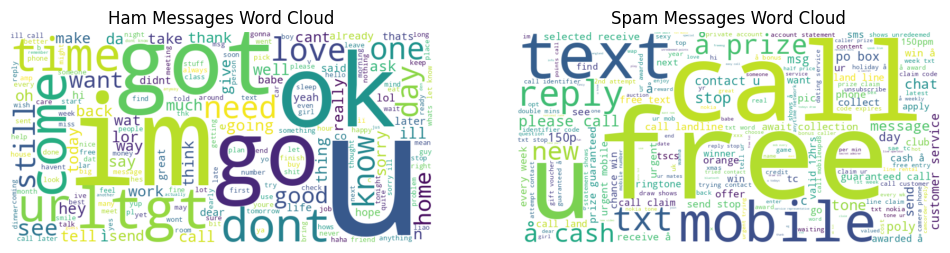

In [ ]:
from wordcloud import WordCloud

# Filter ham and spam messages
ham_messages = data[data['labels'] == 'ham']['messages']
spam_messages = data[data['labels'] == 'spam']['messages']

# Apply the remove_stopwords function to ham and spam messages
ham_text = ' '.join(ham_messages.apply(transform_message))
spam_text = ' '.join(spam_messages.apply(transform_message))

# Create word clouds for ham and spam messages
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

# Display the ham word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Messages Word Cloud')

# Display the spam word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages Word Cloud')

# Show the plot
plt.show()

# 5. Vectorization

**1. Bag of Words**

 - Use the CountVectorizer to convert the processed text into numerical data for model training.

In [ ]:
# Apply the transformation to the messages in the dataset
data['messages'] = data['messages'].apply(transform_message)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(analyzer=transform_message)
X = vectorizer.fit_transform(data['messages'])

**2. TF-IDF Transformation**

 - Apply TfidfTransformer to weigh the importance of words in the dataset and reduce the impact of common words.

In [ ]:
# Convert to TF-IDF
tfidf_transformer = TfidfTransformer().fit(X)
X_tfidf = tfidf_transformer.transform(X)

# 6. Model Training

**1. Training and Testing Data Split**

 - Split the dataset into training (70%) and testing (30%) sets.

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['labels'], test_size=0.30, random_state=50)

**2. Training the Model**

 - Using a Support Vector Classifier (SVC) with a linear kernel to train the model.

**About the algorithm**

*Support Vector Classifier (SVC)* is a machine learning algorithm used for classification tasks. It is based on the concept of Support Vector Machines (SVM), which aims to find the optimal decision boundary (hyperplane) that separates data points of different classes.

**Example **: Think of it as drawing a straight line to separate apples and oranges in a scatter plot

 - *Linear Kernel*
    - Used when the data is linearly separable.
    - Less computationally expensive.
    - Works well when there are more features than samples.

**Why Use SVC?**
 - Handles high-dimensional data efficiently, like text data with thousands of features.
 - Reduces overfitting by maximizing the margin between classes.
 - Performs well with sparse data created after vectorization.
 - Excellent for binary classification tasks (e.g., spam vs. not spam).
 - Flexible with kernel functions; the linear kernel is simple and effective for this task

In [ ]:
# Train a Support Vector Classifier (SVC)
clf = SVC(kernel='linear').fit(X_train, y_train)

**3. Making Predictions**

 - Predict the labels for the test dataset using the trained model.

In [ ]:
# Make predictions on the test set
predictions = clf.predict(X_test)

# 7. Evaluation

**1. Comparison of Predictions and Actual Values**

 - Print predicted and actual values side by side for manual inspection.

In [ ]:
# Print the predictions and actual values side by side
print("Predictions vs Actual values:")
for pred, actual in zip(predictions, y_test):
    print(f"Predicted: {pred}, Actual: {actual}")

Predictions vs Actual values:
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: spam
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: spam
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: spam, Actual: spam
Predicted: spam, Actual: spam
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: ham, Actual: ham
Predicted: h

**2. Visualizations**

 - *Scatter Plot*: Compare predicted vs. actual values using a scatter plot to visualize model performance.

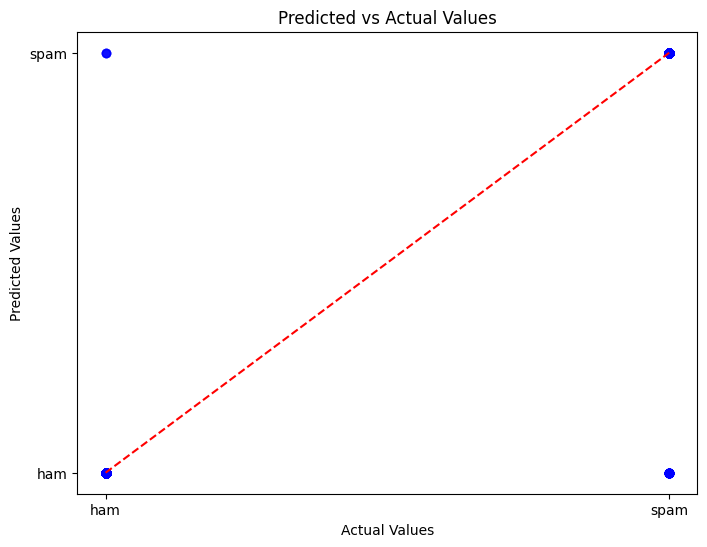

In [ ]:
# Create a scatter plot to compare predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # line of perfect prediction
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**3. Performance Metrics**

 - Classification report to evaluate precision, recall, and F1-score
 - Confusion matrix to understand true positives, false positives, false negatives, and true negatives.

In [ ]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1426
        spam       0.98      0.86      0.92       246

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672

Confusion Matrix:
[[1422    4]
 [  35  211]]


**A Confusion Matrix** is a tool to evaluate the performance of a classification model by comparing actual labels with predicted labels. It has four main components:

 - True Positives (TP): Correctly classified as the positive class (e.g., spam correctly predicted as spam).
 - True Negatives (TN): Correctly classified as the negative class (e.g., not spam correctly predicted as not spam).
 - False Positives (FP): Incorrectly classified as the positive class (e.g., not spam predicted as spam).
 - False Negatives (FN): Incorrectly classified as the negative class (e.g., spam predicted as not spam).
Insights from

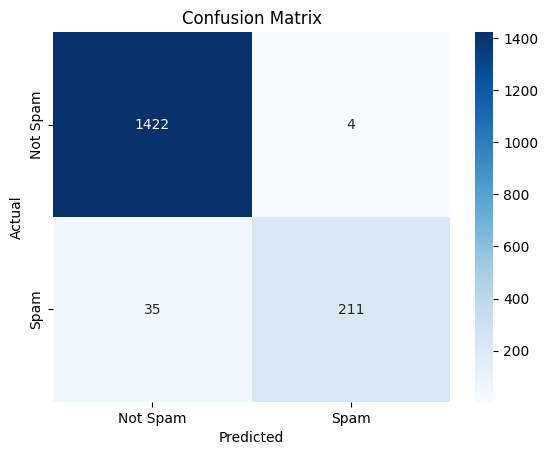

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()